In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train=pd.read_csv('/kaggle/input/black-friday/train.csv')
df_test=pd.read_csv('/kaggle/input/black-friday/test.csv')
df_train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [7]:
df.drop(['User_ID'],axis=1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2, '26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [13]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [14]:
df=pd.concat([df,df_city],axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,1000002,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [15]:
df.drop('City_Category',axis=1,inplace=True)

In [16]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,1000001,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,1000002,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,True,False
783663,1006036,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,True,False
783664,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,True,False
783665,1006037,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,False,True


In [17]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [18]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
#replace null values with mode
df['Product_Category_2'].mode()[0]

8.0

In [20]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [21]:
df['Product_Category_2'].isnull().sum()

0

In [22]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
df['Product_Category_3'].mode()[0]

16.0

In [24]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
df['Product_Category_3'].isnull().sum()

0

In [26]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,1000002,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,3,15,4+,1,8,8.0,16.0,NaN,True,False
783663,1006036,P00254642,0,3,15,4+,1,5,8.0,16.0,NaN,True,False
783664,1006036,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,True,False
783665,1006037,P00124742,0,5,1,4+,0,10,16.0,16.0,NaN,False,True


In [27]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,1000002,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), fl

In [31]:
#converting object into int
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  bool   
 12  C                           783667 non-null  bool   
dtypes: bool(2), fl

In [32]:
df['B'] = df['B'].replace({False: 0, True: 1})

/tmp/ipykernel_18/3033461875.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['B'] = df['B'].replace({False: 0, True: 1})


In [33]:
df['C'] = df['C'].replace({False: 0, True: 1})
df

/tmp/ipykernel_18/439765936.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['C'] = df['C'].replace({False: 0, True: 1})


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,1006036,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,1006036,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  B                           783667 non-null  int64  
 12  C                           783667 non-null  int64  
dtypes: float64(3),

<Axes: xlabel='Age', ylabel='Purchase'>

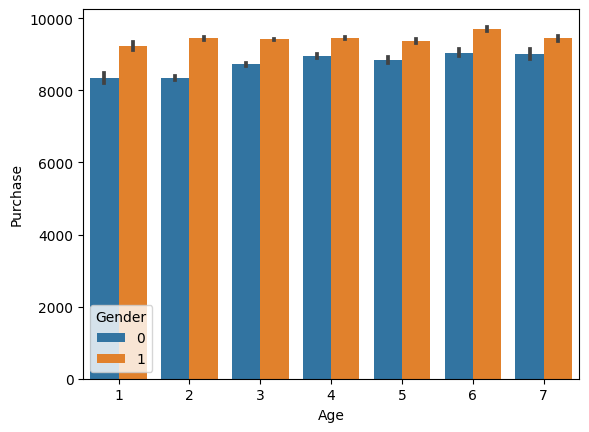

In [35]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

In [36]:
#Observations
#1. purchases of Men is high compared to Women

<Axes: xlabel='Occupation', ylabel='Purchase'>

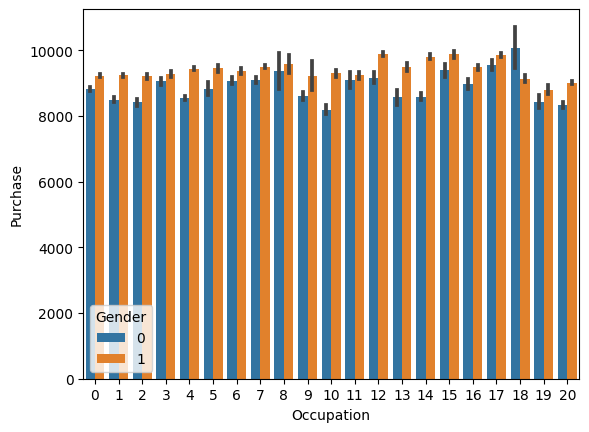

In [37]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

In [38]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

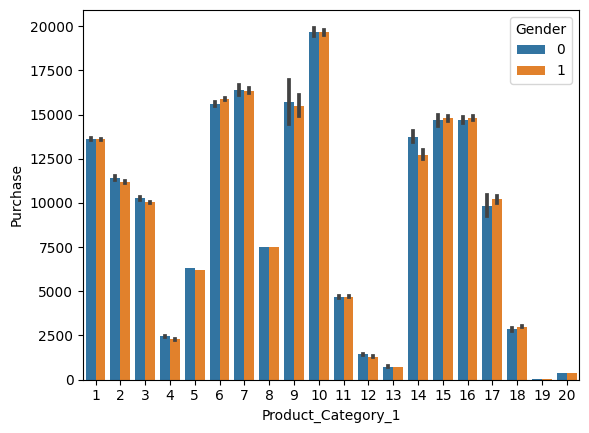

In [39]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

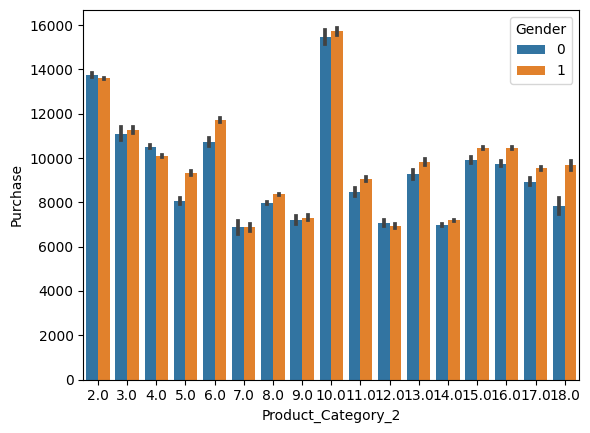

In [40]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

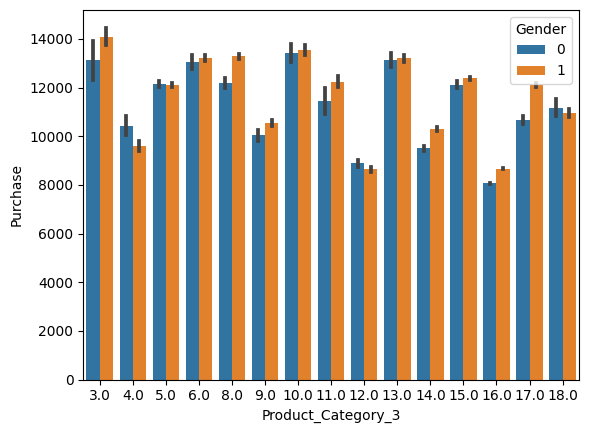

In [41]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [42]:
#Feature Scaling
df_test=df[df['Purchase'].isnull()]
df_train=df[~df['Purchase'].isnull()]

In [43]:
df_test


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,1000004,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,1000009,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,1000010,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,1000010,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,1000011,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,1006036,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,1006036,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,1006037,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [44]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1000001,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,1000001,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,1000001,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1000002,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,1006035,P00375436,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,1006036,P00375436,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,1006038,P00375436,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [45]:
X=df_train.drop('Purchase',axis=1)

In [46]:
X.shape

(550068, 12)

In [47]:
y=df_train['Purchase']
y.shape

(550068,)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [49]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
# Evaluate with MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 21937850.479588892


In [53]:
y_pred

array([11799.41113611, 10501.24283293,  7322.22849904, ...,
       10386.54552426, 11689.40119307, 10628.09630654])

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
RF = RandomForestRegressor(n_estimators=10,max_depth=7,n_jobs=-1,random_state=42)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=10, n_jobs=-1, random_state=42)

In [55]:
y_pred = RF.predict(X_test)
y_pred

array([13928.5274186 , 13135.09448766,  7456.30144271, ...,
       10989.18493765, 13635.39507425, 13049.79610859])